# PROJECT STEPS

<li>  Reading the data set and Introduction</li>
<li> Exploratory Data Analysis with Pandas and NumPy</li>
<li> Data Preparation using Sklearn</li>
<li> Selecting and Training a few Machine Learning Models
<li> Cross-Validation and Hyperparameter Tuning using Sklearn</li>
<li> Deploying the Final Trained Model</li>


This data set contains a single file which compares various booking information between two hotels: a resort hotel(H1), and a city hotel(H2) , comprehending bookings due to arrive between July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. [Article](https://www.sciencedirect.com/science/article/pii/S2352340918315191)


## Introduction

- In the following midterm project , I decided to use the [Hotel booking demand data set](https://www.kaggle.com/jessemostipak/hotel-booking-demand) from Kaggle, to predict whenever a customer's booking will be cancelled or not. I thought this was a really good data set to practice and learn a lot about ML techniques and challenges , as this dataset contained tons of features and clean data to work with , furthermore , the proposed [Article](https://www.sciencedirect.com/science/article/pii/S2352340918315191) was really helpful to understand how this dataset worked.


## <b> Task </b>: Predict the possibility of a booking


In [46]:
# importing necessary modules


import pygal


import numpy as np
from numpy import mean
import pandas as pd


# graphing libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import graphviz
# importing libraries for xgboost
import xgboost



from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score 


import kaleido # to export map to img


#matplotlib styles
plt.style.use(['ggplot'])


#supress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import subprocess

from subprocess import check_output
import gc

%matplotlib inline



## Reading the data set


In [47]:
df = pd.read_csv('input/hotel_bookings.csv')

In [48]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [49]:
# checking amount of rows and columns

df.shape

(119390, 32)

## Exploratory Data Analysis with Pandas and NumPy


In [50]:
# checking data types

df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [51]:
df.nunique()  # checking unique values


hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [52]:
df.isnull().sum()  # Null values


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [53]:
df.isnull().sum().sort_values(ascending=False)



company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

We can see that the features that present the more amount of NULL values are:

- Company:ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

- Agent:ID of the travel agency that made the booking

- Country:Country of origin. Categories are represented in the ISO 3155–3:2013 format


In [54]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

<AxesSubplot:>

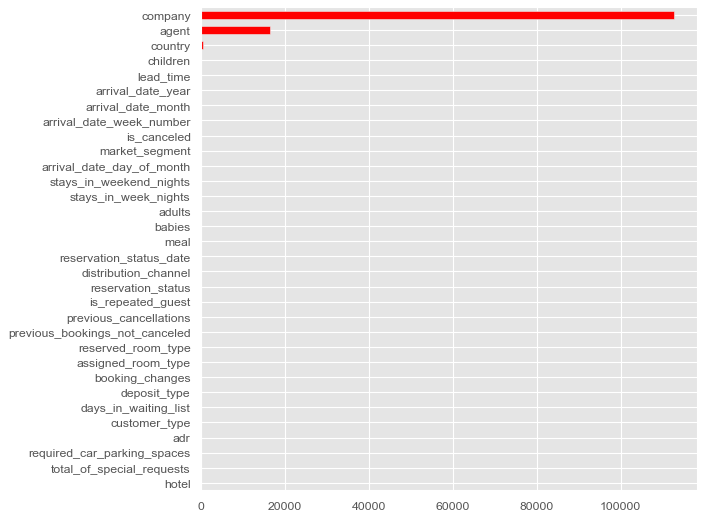

In [55]:
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

df.isnull().sum().sort_values(ascending=True).plot(kind='barh',color='red')

From the article , the `NULL` values present in the categorical variables of `company` and `agent` should not be considered as missing , rather as "not applicable" so I decided to fill them with 0 rather than dropping them, as It may be helpful to the performance of the models .


## <b> Answering a few questions with EDA: </b>

- How much people actually cancel ?
- Where do the guests come from? (Country of H1 and H2)
- Cancelations by each Hotel Type
- How much guests come in each month ?
- How likely is for a repeated and non repeated guest to cancel a booking
- Main customers type
- lead_time vs cancellation
- Previous cancellations
- What kind of Market(Type of customer ) is more likely to cancel a booking?


## 1. How much people actually cancel ?


## 2. Where do the guests come from? (Country of H1 and H2)



In [56]:
from collections import Counter

count = Counter(df.country)

In [57]:
count

Counter({'PRT': 48590,
         'GBR': 12129,
         'USA': 2097,
         'ESP': 8568,
         'IRL': 3375,
         'FRA': 10415,
         nan: 488,
         'ROU': 500,
         'NOR': 607,
         'OMN': 18,
         'ARG': 214,
         'POL': 919,
         'DEU': 7287,
         'BEL': 2342,
         'CHE': 1730,
         'CN': 1279,
         'GRC': 128,
         'ITA': 3766,
         'NLD': 2104,
         'DNK': 435,
         'RUS': 632,
         'SWE': 1024,
         'AUS': 426,
         'EST': 83,
         'CZE': 171,
         'BRA': 2224,
         'FIN': 447,
         'MOZ': 67,
         'BWA': 1,
         'LUX': 287,
         'SVN': 57,
         'ALB': 12,
         'IND': 152,
         'CHN': 999,
         'MEX': 85,
         'MAR': 259,
         'UKR': 68,
         'SMR': 1,
         'LVA': 55,
         'PRI': 12,
         'SRB': 101,
         'CHL': 65,
         'AUT': 1263,
         'BLR': 26,
         'LTU': 81,
         'TUR': 248,
         'ZAF': 80,
         'AGO':

In [58]:
df_resort = df.loc[df.hotel == 'Resort Hotel']  # pick members from H1


In [59]:
import matplotlib.image as img


def show_country_map(country,title):
    
    c = Counter(country)

    country = pd.DataFrame.from_records(list(dict(c).items()),
                                        columns=['country', 'count'])
    total_guests = country["count"].sum()


    country["Guests in %"] = round(country["count"] / total_guests * 100, 2)


    guest_map = px.choropleth(
        country,
        locations=country.country,
        color=country["Guests in %"],
        hover_name=country.country,
        color_continuous_scale=px.colors.sequential.Inferno,
        title=title)


    guest_map.write_image("img/map.png", width=1280, height=720)

    im = img.imread('img/map.png')
    # show image
    fig = plt.gcf()
    fig.set_size_inches(20, 20)
    plt.grid(b=None)

    plt.imshow(im)


In [60]:
def plot_pie(country,title):
    c = Counter(country).most_common(10)


    country = pd.DataFrame.from_records(list(dict(c).items()),
                                        columns=['country', 'count'])
    plt.pie(
        country["count"],
        labels=country["country"],
        autopct='%1.1f%%',
        shadow=True,
        startangle=140,
    )

    my_circle=plt.Circle( (0,0), 0.7, color='white')

    plt.title(title)
    plt.gca().add_artist(my_circle)
    fig = plt.gcf()
    fig.set_size_inches(8, 8)
    plt.show()

In [61]:
df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

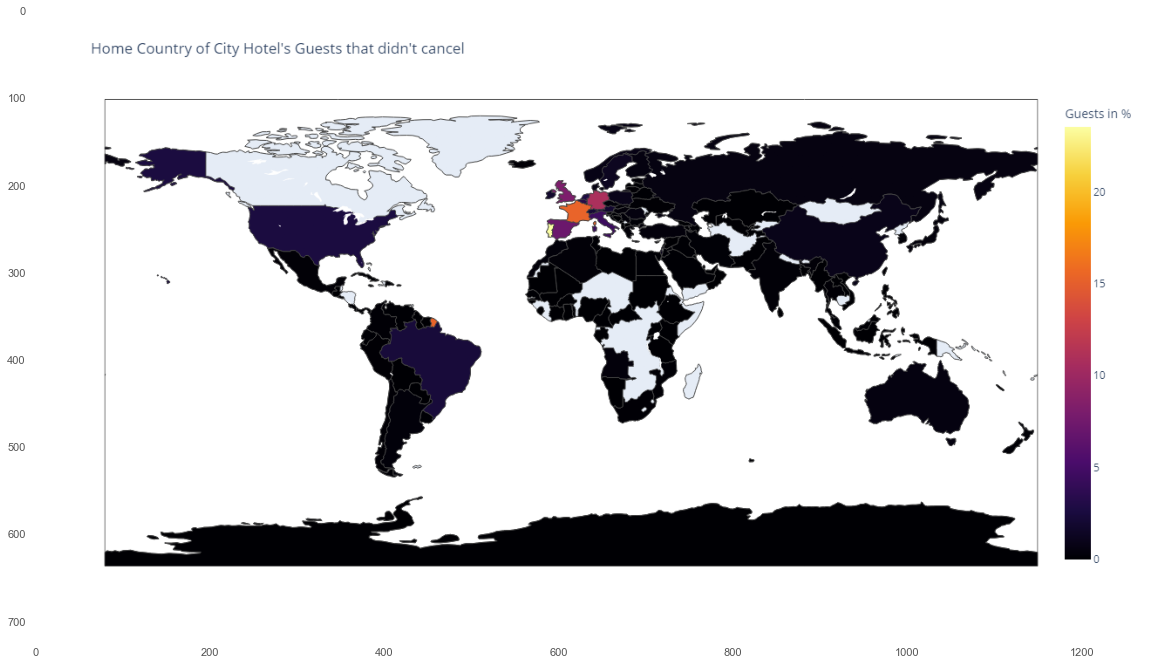

In [62]:
# For H1

df_city = df.loc[df.hotel == 'City Hotel']

title = "Home Country of City Hotel's Guests that didn't cancel "

show_country_map(df_city.loc[df_city.is_canceled == 0].country,title)


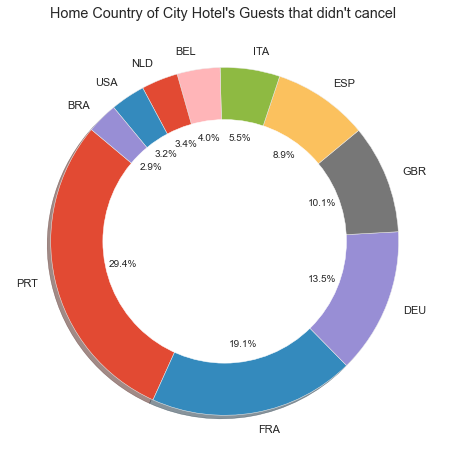

In [63]:
df_resort = df.loc[df.hotel == 'Resort Hotel']


title = "Home Country of City Hotel's Guests that didn't cancel "

plot_pie(df_city.loc[df_city.is_canceled == 0].country,title)


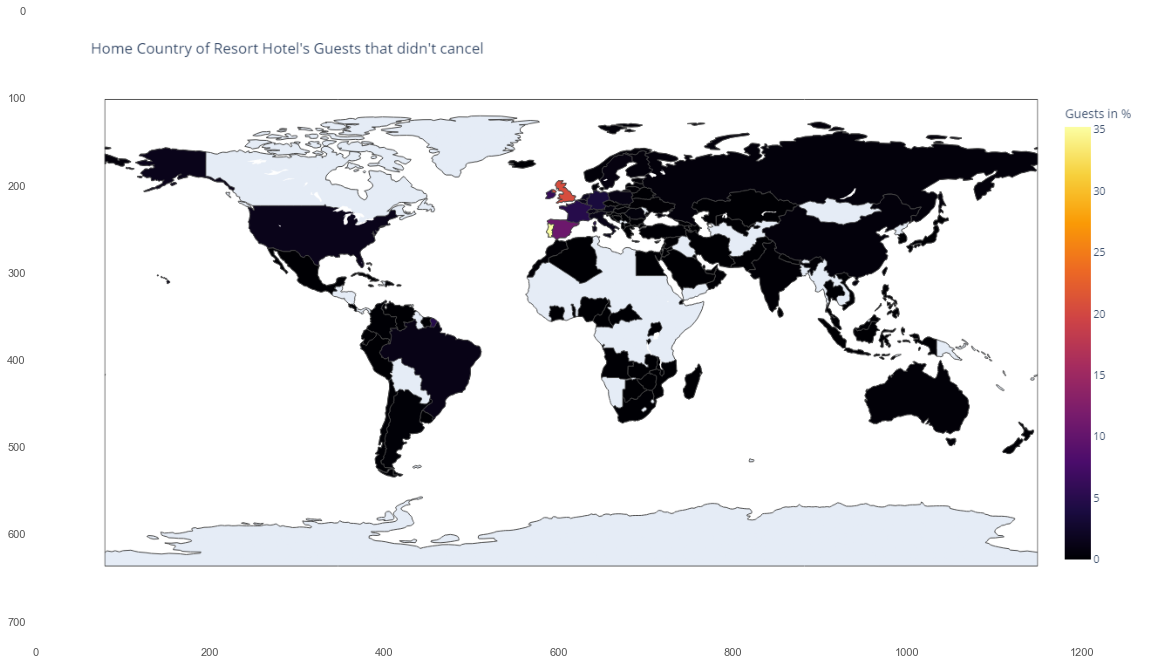

In [64]:
# For H2

df_resort = df.loc[df.hotel == 'Resort Hotel']


title = "Home Country of Resort Hotel's Guests that didn't cancel "


show_country_map(df_resort.loc[df_resort.is_canceled == 0].country,title)


We can see that the mayority of customers for Resort Hotels come From Portugal, which makes a lot of sense , given that is explained in the Article that both Hotels are located in Portugal, where H1 is located at Algarve and H2 at Lisbon . Likewise , a lot of customers also come from Europe countries.

### <b> Cancellations by country </b>

Now let's see the main country of people that actually canceled 

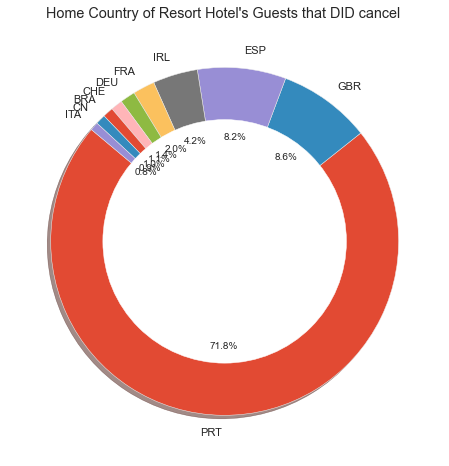

In [65]:
# plot top 10 country of guests

title = "Home Country of Resort Hotel's Guests that DID cancel "


plot_pie(df_resort.loc[df_resort.is_canceled == 1].country,title)


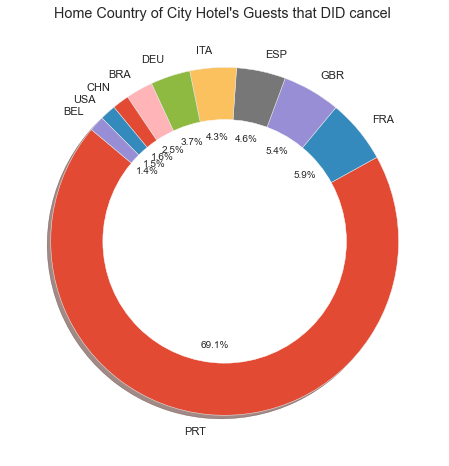

In [66]:

title = "Home Country of City Hotel's Guests that DID cancel "

plot_pie(df_city.loc[df_city.is_canceled == 1].country,title)


We see that the majority of customers that cancelled their booking comes from portugal as well, but this data is only telling us the percentages , so it would be interesting to see what country has the highest cancellation rate.

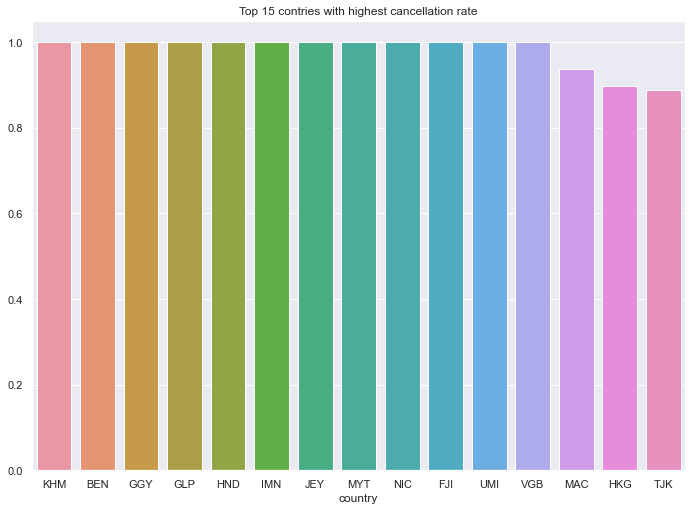

In [67]:

result = df.groupby('country')['is_canceled'].mean().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})


x=result[:15].index
y=result[:15].values

ax = sns.barplot(x,y,data=df,estimator=mean)

ax.set_title('Top 15 contries with highest cancellation rate');

We can see that these countries have a significantly high cancellation rate, with some reaching '1.0' even.

In [68]:
group = df.groupby('country')['is_canceled'].agg(['count','mean'])

In [69]:
group.sort_values(by='mean',ascending=False)[:15]

,count,mean
country,,
KHM,2,1.000000
BEN,3,1.000000
GGY,3,1.000000
GLP,2,1.000000
HND,1,1.000000
IMN,2,1.000000
JEY,8,1.000000
MYT,2,1.000000
NIC,1,1.000000


Upon further inspection , we can see that these countries actually have really low data numbers, so maybe it should be considered to drop this column ,to avoid making wrong assumptions about customers of those countries.

## 2. Cancellations for each hotel type


<AxesSubplot:title={'center':'For city hotel'}, ylabel='is_canceled'>

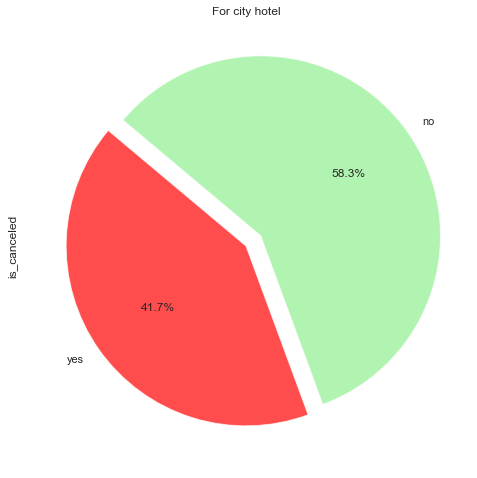

In [70]:

explode = (0, 0.1)

labels = 'yes', 'no'

df_city.is_canceled.value_counts().sort_values().plot.pie(
    labels=labels, autopct='%1.1f%%', title='For city hotel',colors=['red','#90EE90'],explode=explode,wedgeprops={'alpha':0.7}, startangle=140)


<AxesSubplot:title={'center':'For resort Hotel'}, ylabel='is_canceled'>

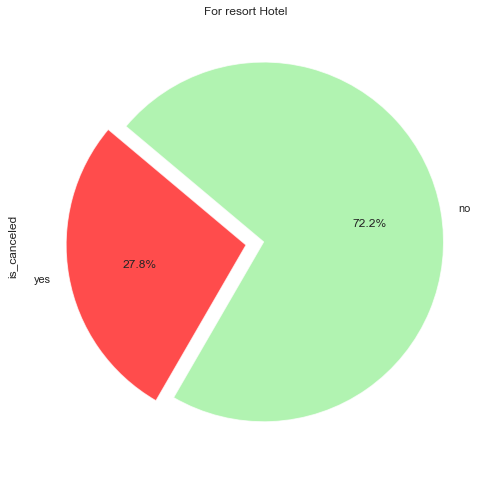

In [71]:

explode = (0, 0.1)

labels = 'yes', 'no'


df_resort.is_canceled.value_counts().sort_values().plot.pie(
    labels=labels, autopct='%1.1f%%', title='For resort Hotel',colors=['red','#90EE90'],explode=explode,wedgeprops={'alpha':0.7}, startangle=140)


It seems like city Hotel customers are a bit more inclined to cancelling their bookings 

## How much guests come each month ?


<AxesSubplot:>

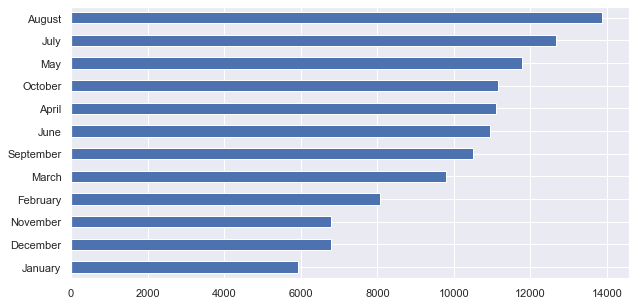

In [72]:
fig = plt.figure(figsize=(10, 5))
df.arrival_date_month.value_counts().sort_values().plot.barh()


<AxesSubplot:>

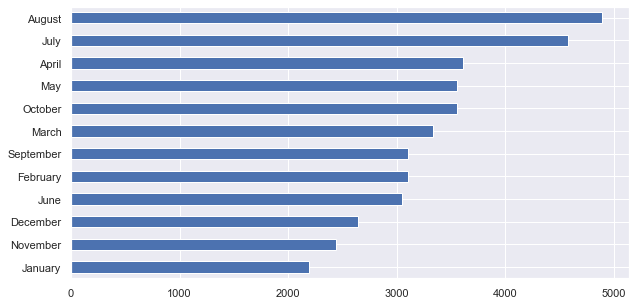

In [73]:
fig = plt.figure(figsize=(10, 5))
df_resort.arrival_date_month.value_counts().sort_values().plot.barh()


`August` and `July` seem to be the busiest month across the board on both hotels.

### Month perfomance for each Hotel

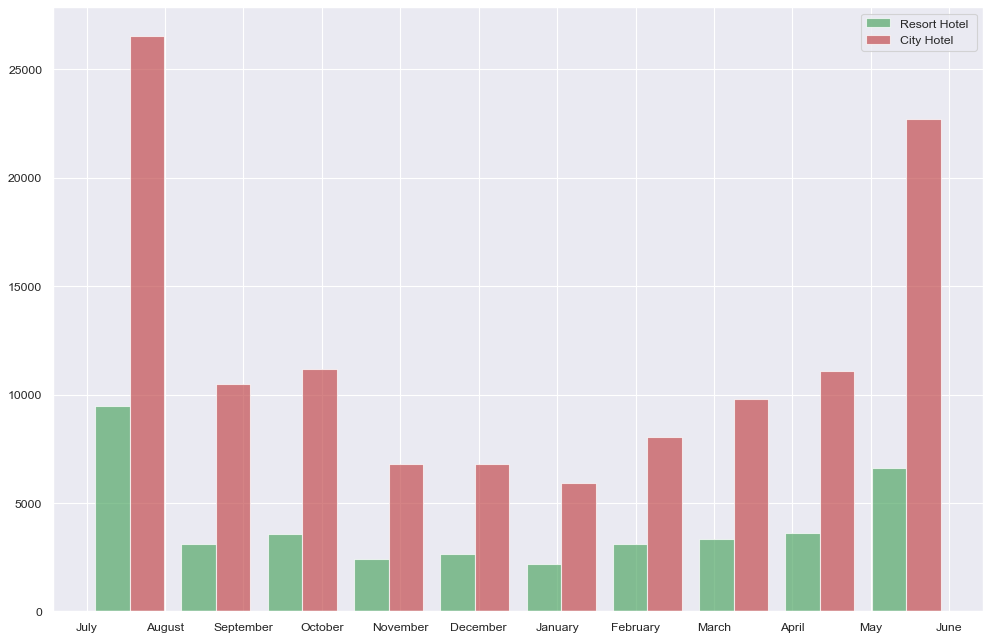

In [74]:
figure(figsize=(15, 10), dpi=80)


x= df_resort.arrival_date_month
y= df.arrival_date_month

labels= ["Resort Hotel ",'City Hotel']


plt.hist([x, y], color=['g','r'], alpha=0.7);
plt.legend(labels=labels);


Both hotels seem to have very similar peaks in months

## How likely is for a repeating customer to cancel a booking


In [75]:
df_repeating = df.loc[df.is_repeated_guest == 1]
df_non_repeating = df.loc[df.is_repeated_guest == 0]

Text(0.5, 1.0, 'Returning Customers canceling bookings ')

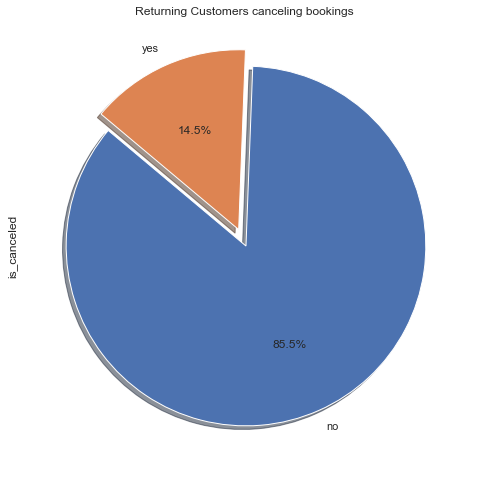

In [76]:
labels = ['no', 'yes']
# explode 2nd slice
explode = (0, 0.1)

df_repeating.is_canceled.value_counts().plot(kind='pie',
                                             labels=labels,
                                             autopct='%1.1f%%',
                                             shadow=True,
                                             startangle=140,
                                             explode=explode)
plt.title("Returning Customers canceling bookings ")


Text(0.5, 1.0, 'Non Returning Customers canceling bookings ')

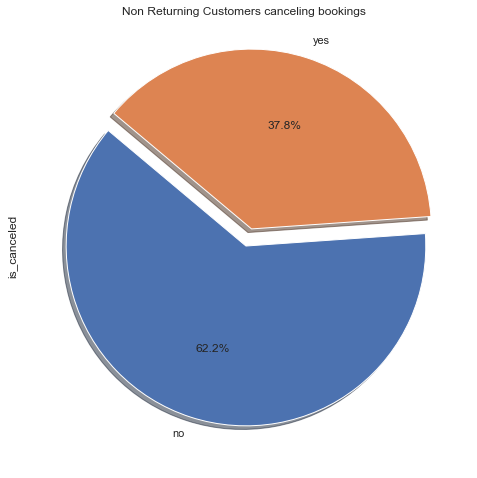

In [77]:
labels = ['no', 'yes']
# explode 2nd slice
explode = (0, 0.1)

df_non_repeating.is_canceled.value_counts().plot(kind='pie',
                                                 labels=labels,
                                                 autopct='%1.1f%%',
                                                 shadow=True,
                                                 startangle=140,
                                                 explode=explode)
plt.title("Non Returning Customers canceling bookings ")

We can see a slight variation comparing returning customers to non returning customers, with the latter being more likely to cancel a booking.


# Feature Selection


## Mutual Information


In [78]:
# filling missing values
df['country'] = df['country'].fillna('NA')
df['children'] = df['children'].fillna(0)

# filling with 0 and converting to int

df['agent'] = df['agent'].fillna(0).astype(int)  
df['company'] = df['company'].fillna(0).astype(int)


In [79]:
# creating numerical and categorial variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical = df.select_dtypes(include=numerics).columns.tolist()

category = ['object']

categorical = df.select_dtypes(include=category).columns.tolist()

In [80]:
print("Initial categorical Features:",categorical)


Initial categorical Features: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [81]:

print("Initial numerical Features:" ,numerical)

Initial numerical Features: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


<AxesSubplot:ylabel='customer_type'>

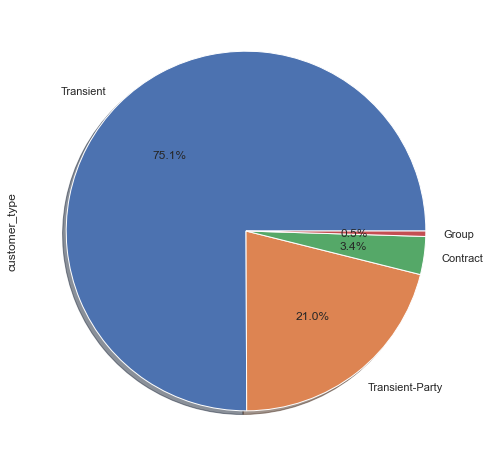

In [82]:
# Main type of customers
df.customer_type.value_counts().plot(kind="pie",
                                     autopct='%1.1f%%',
                                     shadow=True)


We can see that Transient represents the majority of customers, that is , customers that are not part of any group or contract


We will calculate the mutual information between the variables X (categorical ) and target y.


In [83]:
def mutual_info_categorical(series):
    return mutual_info_score(series, df.is_canceled)

<AxesSubplot:>

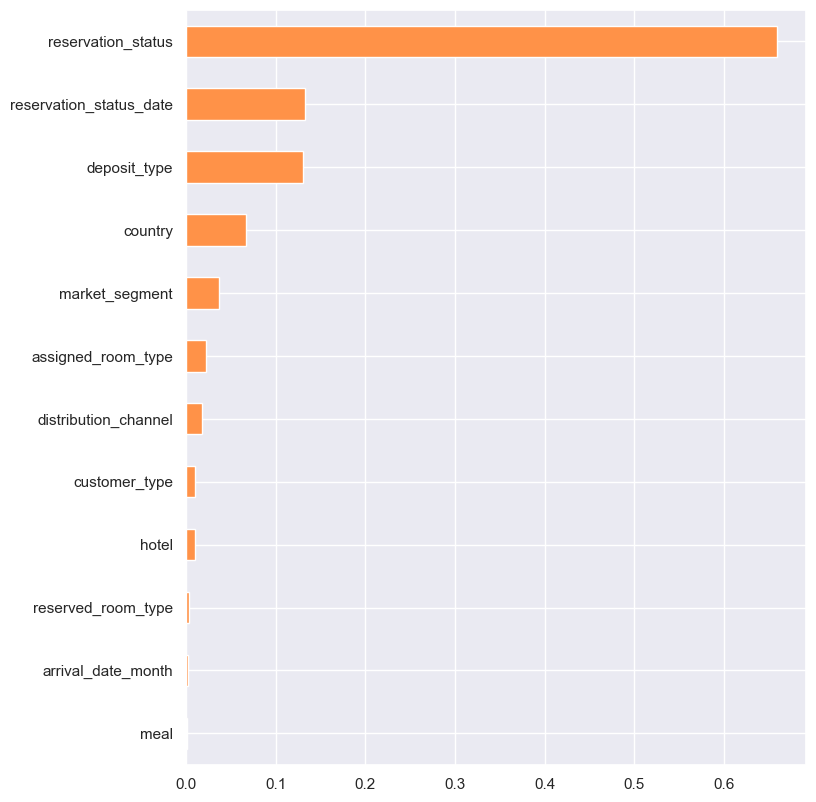

In [84]:

from sklearn.metrics import mutual_info_score

mi = df[categorical].apply(mutual_info_categorical)
figure(figsize=(8, 10), dpi=100)
mi.sort_values(ascending=True).plot(kind='barh',color='#ff9248')


We can see that the 3 most important features are `reservation_status` , `reservation_status_date` and `deposit_type`


However ,to avoid over-fitting and data leakage , it would be better to drop the `reservation_status` variable


---


## Reservation Status vs Actual cancellations


Reservation_status : Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why


In [85]:
df.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [86]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

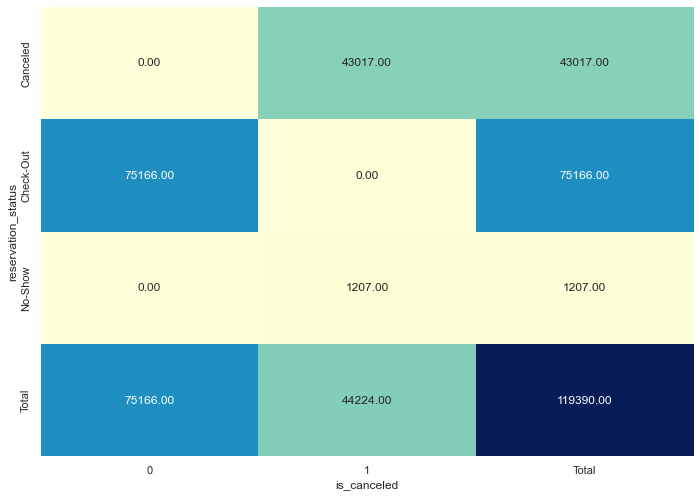

In [87]:
tab = pd.crosstab(columns=df['reservation_status'],
                  index=df['is_canceled'],
                  margins=True,
                  margins_name='Total')

res = sns.heatmap(tab.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)

plt.savefig("img/crosstab_pandas.png", bbox_inches='tight', dpi=100)

plt.show()

We can clearly see how this variable is affecting the result and may cause data leakage, so we will exclude it along with `reservation_status_date`


In [88]:
#df = df.drop(['reservation_status', 'reservation_status_date'], axis=1)


In [89]:
categorical.remove('reservation_status')
categorical.remove('reservation_status_date')

<AxesSubplot:>

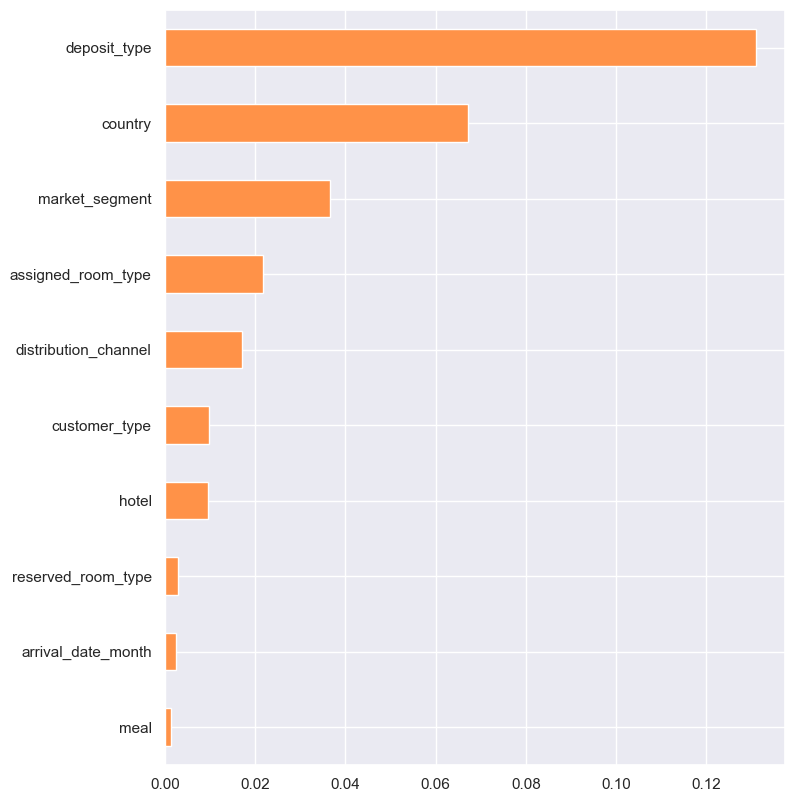

In [90]:
from matplotlib.pyplot import figure
from sklearn.metrics import mutual_info_score

mi = df[categorical].apply(mutual_info_categorical)
figure(figsize=(8, 10), dpi=100)
mi.sort_values(ascending=True).plot(kind='barh',color='#ff9248')


In [91]:
mi.sort_values(ascending=False)

deposit_type            0.130952
country                 0.067132
market_segment          0.036687
assigned_room_type      0.021782
distribution_channel    0.017106
customer_type           0.009796
hotel                   0.009541
reserved_room_type      0.002776
arrival_date_month      0.002489
meal                    0.001264
dtype: float64

We also want to make our model to be as <i> general </i> as possible, as well as preventing the model to be biased towards determined countries , so we will exclude `country` . Furthermore, according to the article , it is also possible that the hotel may not know the correct nationality of the customer until the actual moment of check-in.

In [92]:
categorical.remove('country')

# Pearson Correlation


- Checking correlation between variables so we can know what variables we can drop , to avoid over fitting


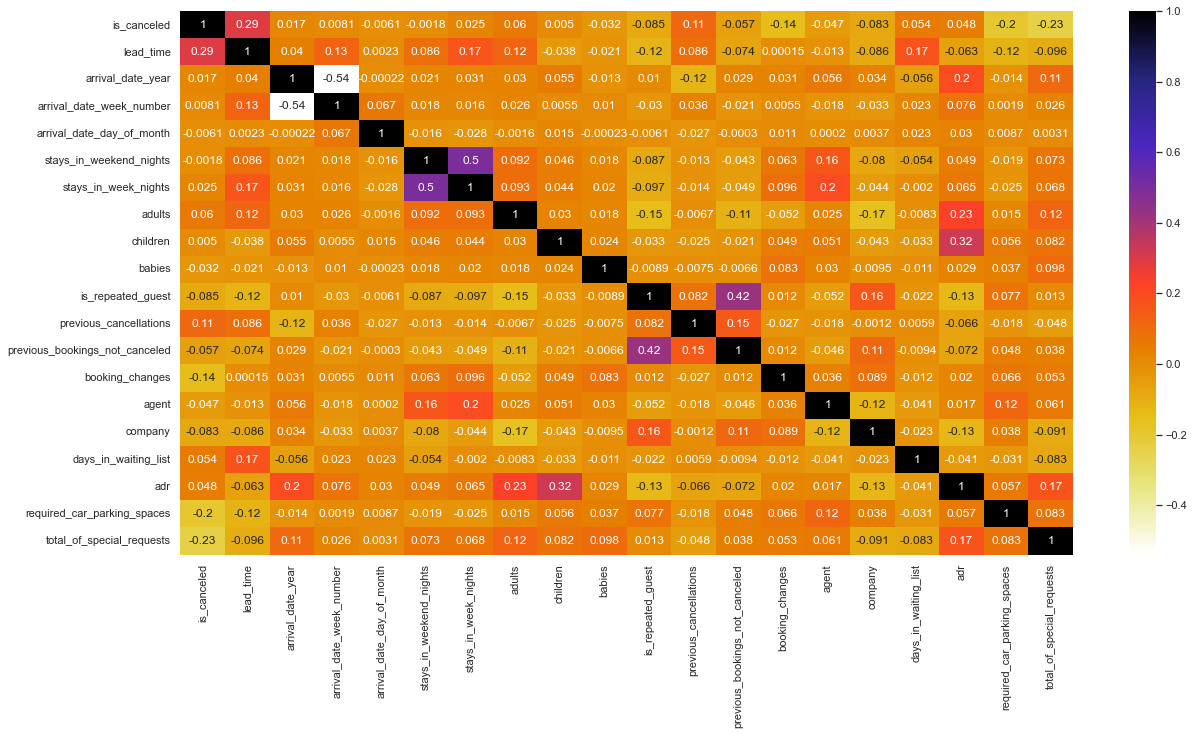

In [93]:
import seaborn as sns
# Using pearson correlation
plt.figure(figsize=(20, 10))
corr = df[numerical].corr(method='pearson')
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Arrival date_week_number  has barely any impact on the target variable $(0.008)$ , so we will remove it

<AxesSubplot:ylabel='customer_type'>

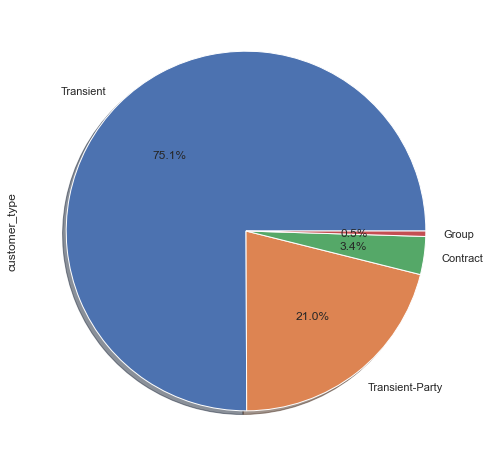

In [94]:
# Main type of customers
df.customer_type.value_counts().plot(kind="pie",
                                     autopct='%1.1f%%',
                                     shadow=True)


In [95]:
# import calendar
# df.arrival_date_year = df.arrival_date_year.map(str)
# df.arrival_date_day_of_month = df.arrival_date_day_of_month.map(str) # to string
# df['arrival_date_month'] = df['arrival_date_month'].str[0:3]
# df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: list(calendar.month_abbr).index(x)) # converting months to month numbers
# df['arrival_date_month'] = df['arrival_date_month'].map(str)

# df['arrival_date'] = df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].agg('-'.join, axis=1)

# df['arrival_date'] = pd.to_datetime(df['arrival_date'],
#  format = '%Y-%m-%d',
#  errors = 'coerce')

# df = df.drop(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']], 1)

# <b> Categorical Variables: </b>

## Deposit_type 

Deposit type indicates whenever a customer made a deposit to guarantee their booking , we will examine this feature in further detail.

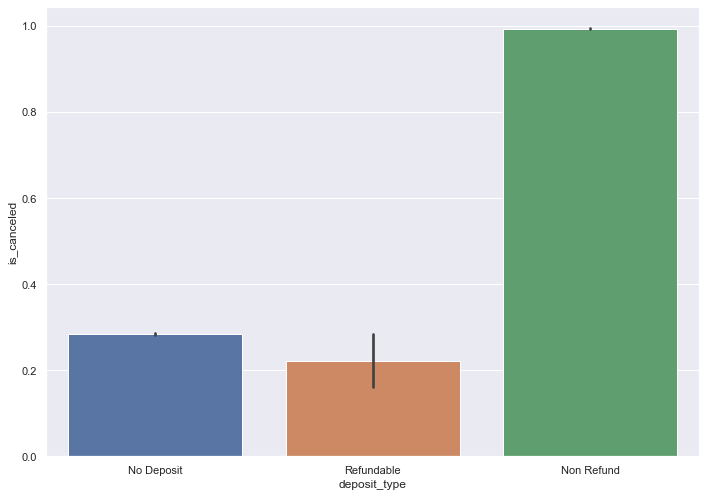

In [96]:
deposit_plot = sns.barplot(x="deposit_type",y="is_canceled",data=df,estimator=mean)

We can see an overwhelming majority of people that choose `non refund` decided to cancel their booking , however we may check that this type of variable does not represent the majority of customers, lets see.

In [97]:
groups = df.groupby('deposit_type')['is_canceled'].count()
groups

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: is_canceled, dtype: int64

In [98]:
df.groupby('deposit_type')['is_canceled'].mean()

deposit_type
No Deposit    0.283770
Non Refund    0.993624
Refundable    0.222222
Name: is_canceled, dtype: float64

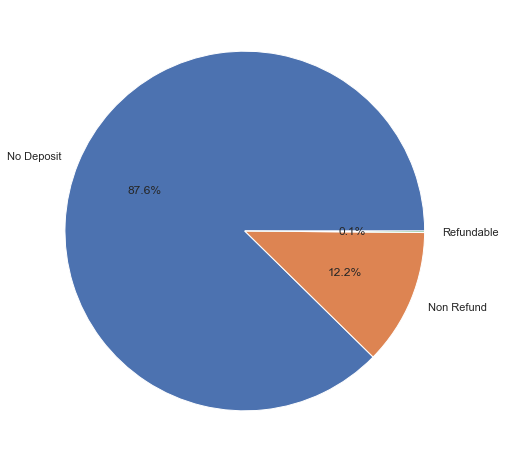

In [99]:
labels=['No Deposit','Non Refund','Refundable']

plt.pie(x=groups,autopct='%1.1f%%',labels=labels);

 `Non refund` customers barely represents 12.2% of the actual data , furthermore ,`Non refund` has a very high value of canceled ratio (almost $100\%$) but its volume is way less compared to the other type of deposits,so, to avoid making wrong assumptions  we will drop this one as well.

In [100]:
categorical.remove('deposit_type')

## Customer_type counts and actual cancellations  

In [101]:
customer = df.groupby('customer_type')['is_canceled'].count()
customer

customer_type
Contract            4076
Group                577
Transient          89613
Transient-Party    25124
Name: is_canceled, dtype: int64

<AxesSubplot:xlabel='customer_type', ylabel='is_canceled'>

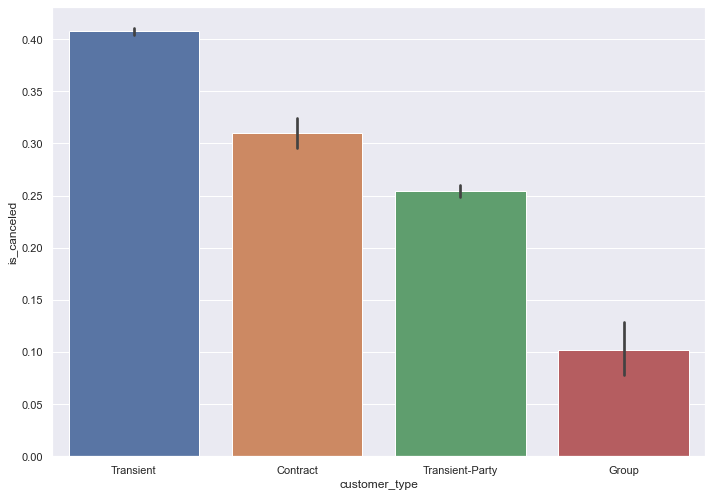

In [102]:
sns.barplot(x="customer_type",y="is_canceled",data=df,estimator=mean)

Transient has enough volume of data, so this feature should be included .

## Reserved Room Type

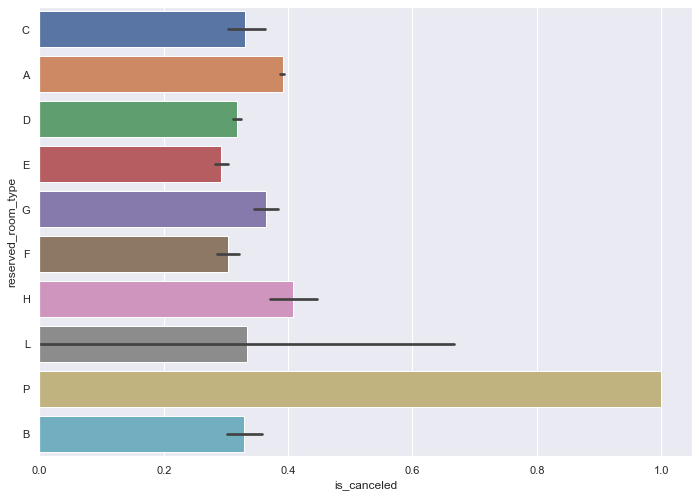

In [103]:
reserved = sns.barplot(y='reserved_room_type',x='is_canceled',data=df,estimator=mean,)

In [104]:
df.groupby('reserved_room_type')['is_canceled'].mean()

reserved_room_type
A    0.391074
B    0.329159
C    0.330472
D    0.317796
E    0.292884
F    0.303763
G    0.364374
H    0.407654
L    0.333333
P    1.000000
Name: is_canceled, dtype: float64

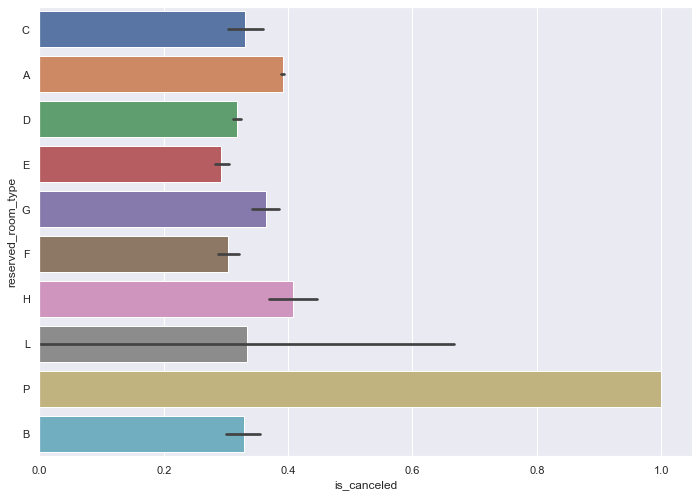

In [105]:
reserved = sns.barplot(y='reserved_room_type',x='is_canceled',data=df,estimator=mean,)

$100 \%$ of people that chose `reserved_room_type` "P" canceled the booking , however , it will be good to verify what amount of the population this group represents.

In [106]:
df['reserved_room_type'].value_counts(normalize=True)* 100

A    72.027808
D    16.082586
E     5.473658
F     2.426501
G     1.753916
B     0.936427
C     0.780635
H     0.503392
P     0.010051
L     0.005026
Name: reserved_room_type, dtype: float64

`reserved_room_type` P represents a measly 0.01 percent of the entire customers but has a  really high cancellation rate , we also see that other rooms are very close to one another in respect to cancellations , we should exclude this feature , given that P has not enough volume of data to back itself up

In [107]:
categorical.remove('reserved_room_type')

## Assigned_room_type

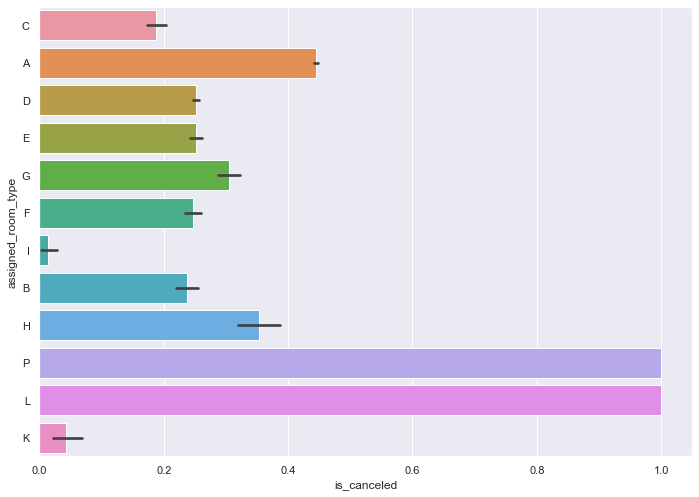

In [108]:
assigned  = sns.barplot(y='assigned_room_type', x='is_canceled',data=df,estimator=mean)

In [109]:
df.groupby('assigned_room_type')['is_canceled'].mean()

assigned_room_type
A    0.444925
B    0.236708
C    0.187789
D    0.251244
E    0.252114
F    0.247134
G    0.305523
H    0.352528
I    0.013774
K    0.043011
L    1.000000
P    1.000000
Name: is_canceled, dtype: float64

In [110]:
df['assigned_room_type'].value_counts(normalize=True)* 100

A    62.026133
D    21.209482
E     6.538236
F     3.141804
G     2.138370
C     1.989279
B     1.811710
H     0.596365
I     0.304046
K     0.233688
P     0.010051
L     0.000838
Name: assigned_room_type, dtype: float64

We can see the exact same deal happens with the assigned_room_type , where L and P have a astonishingly high cancellation but barely any data to back it up, so it should also be excluded .

In [111]:
categorical.remove('assigned_room_type')

## <b> Numerical  </b>


### Lead_time :Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

In [112]:
df['lead_time'].value_counts()

0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64

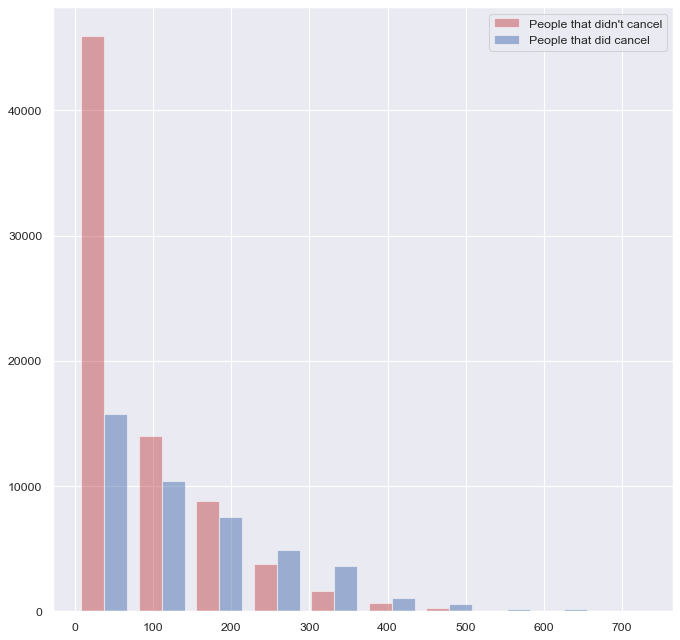

In [113]:
figure(figsize=(10, 10), dpi=80)


x= df.loc[df["is_canceled"]==0]['lead_time']
y=df.loc[df["is_canceled"]==1]['lead_time']

labels= ["People that didn't cancel",'People that did cancel']


plt.hist([x, y], color=['r','b'], alpha=0.5);
plt.legend(labels=labels);


We see a  variation in the graph, there is a high disproportion of values for  People that didn't cancel and people who did between the range of 0 to 100 days, but after that it gets a bit more even, until 200+ days where people that cancelled take the lead .

##  Removing the target variable from numerical

In [114]:
numerical.remove('is_canceled')

## Final features to include 

In [115]:
display(categorical)

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'customer_type']

In [116]:
display(numerical)

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

# Setting up validation framework


In [117]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2,random_state=0)
df_train, df_val = train_test_split(df_full_train, test_size=0.25,random_state=0)


In [118]:
len(df_train), len(df_val), len(df_test)


(71634, 23878, 23878)

In [119]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.is_canceled.values
y_val = df_val.is_canceled.values
y_test = df_test.is_canceled.values


In [120]:

del df_train['is_canceled']
del df_val['is_canceled']
del df_test['is_canceled']


## Feature selection | Feature Importance


What features to delete ?


In [121]:
df_full_train = df_full_train.reset_index(drop=True)


<AxesSubplot:ylabel='is_canceled'>

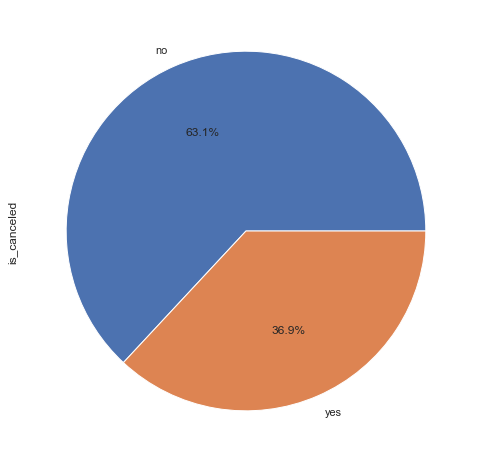

In [122]:
labels = "no", "yes"
df_full_train.is_canceled.value_counts(normalize=True).plot(kind="pie",
                                                            autopct='%1.1f%%',
                                                            labels=labels)


In [123]:
df[categorical].dtypes

hotel                   object
arrival_date_month      object
meal                    object
market_segment          object
distribution_channel    object
customer_type           object
dtype: object

## Numerical features


<AxesSubplot:>

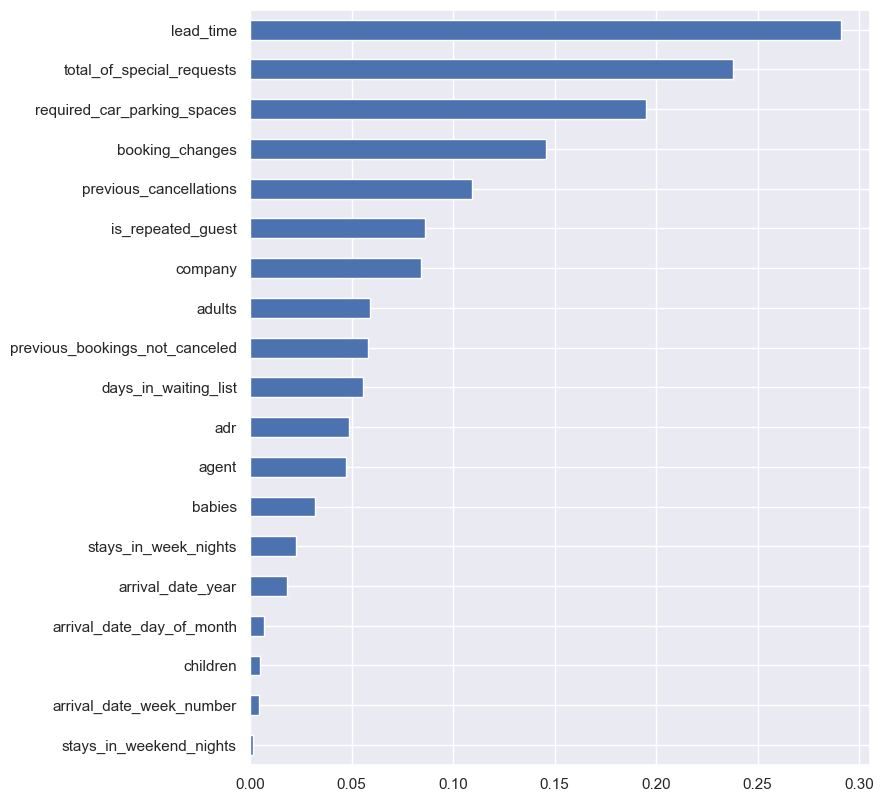

In [124]:
correlation = df_full_train.corr()['is_canceled'].abs().sort_values(
    ascending=True)
figure(figsize=(8, 10), dpi=100)
correlation.iloc[:-1].plot(kind='barh')


We get that the most important features are `lead_time`(Number of days elapsed between entering day of the booking and arrival ), `total_of_special_requests` ,`agent` and `required_car_parking_spaces`


# One hot encoding


In [125]:
df_full_train[categorical].head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,customer_type
0,City Hotel,August,BB,Online TA,TA/TO,Transient
1,City Hotel,August,BB,Online TA,TA/TO,Transient
2,City Hotel,September,BB,Online TA,TA/TO,Transient
3,City Hotel,March,BB,Online TA,TA/TO,Transient
4,City Hotel,April,HB,Direct,Direct,Transient


In [126]:
# Using sklearn to encode the categorical features

from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)




train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [127]:
dv.get_feature_names()


['adr',
 'adults',
 'agent',
 'arrival_date_day_of_month',
 'arrival_date_month=April',
 'arrival_date_month=August',
 'arrival_date_month=December',
 'arrival_date_month=February',
 'arrival_date_month=January',
 'arrival_date_month=July',
 'arrival_date_month=June',
 'arrival_date_month=March',
 'arrival_date_month=May',
 'arrival_date_month=November',
 'arrival_date_month=October',
 'arrival_date_month=September',
 'arrival_date_week_number',
 'arrival_date_year',
 'babies',
 'booking_changes',
 'children',
 'company',
 'customer_type=Contract',
 'customer_type=Group',
 'customer_type=Transient',
 'customer_type=Transient-Party',
 'days_in_waiting_list',
 'distribution_channel=Corporate',
 'distribution_channel=Direct',
 'distribution_channel=GDS',
 'distribution_channel=TA/TO',
 'distribution_channel=Undefined',
 'hotel=City Hotel',
 'hotel=Resort Hotel',
 'is_repeated_guest',
 'lead_time',
 'market_segment=Aviation',
 'market_segment=Complementary',
 'market_segment=Corporate',
 '

In [128]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')


In [129]:
X_test = dv.transform(dicts_test)


# Training logistic regression with Scikit-Learn


In [130]:
from sklearn.linear_model import LogisticRegression


In [131]:
classifier = LogisticRegression(random_state=0, max_iter=1000)
classifier.fit(X_train, y_train)

C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=1000, random_state=0)

In [132]:
y_pred_lr = classifier.predict(X_test)


In [133]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
cm


array([[13385,  1549],
       [ 3745,  5199]], dtype=int64)

In [134]:
from sklearn.metrics import accuracy_score

lr_score = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy Score of Logistic Regression: {lr_score}")


Accuracy Score of Logistic Regression: 0.7782896389982411


Checking the Precision and recall value


In [135]:
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")


Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.90      0.83     14934
           1       0.77      0.58      0.66      8944

    accuracy                           0.78     23878
   macro avg       0.78      0.74      0.75     23878
weighted avg       0.78      0.78      0.77     23878



## AUC Curve of Logistic Regression


In [136]:
from sklearn import metrics


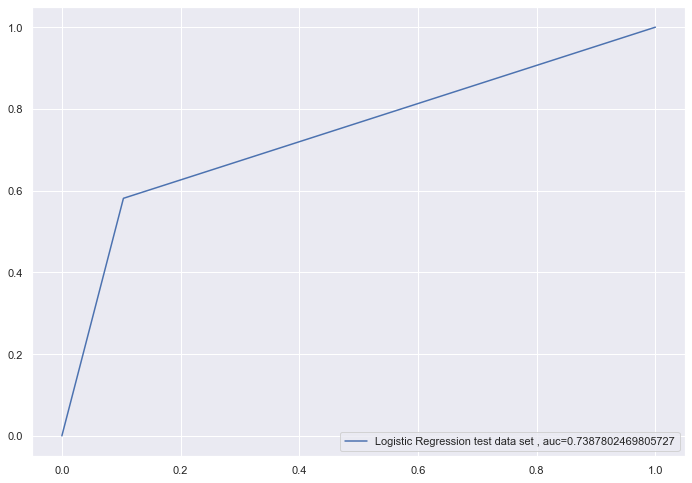

In [232]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_lr)
auc = metrics.roc_auc_score(y_test, y_pred_lr)
plt.plot(fpr, tpr, label="Logistic Regression test data set , auc=" + str(auc))
plt.legend(loc=4)
plt.show()


## Test 1 customer


In [138]:
customer = dicts_test[-40]


In [139]:
customer

{'hotel': 'City Hotel',
 'arrival_date_month': 'January',
 'meal': 'BB',
 'market_segment': 'Groups',
 'distribution_channel': 'TA/TO',
 'customer_type': 'Transient',
 'lead_time': 86,
 'arrival_date_year': 2016,
 'arrival_date_week_number': 4,
 'arrival_date_day_of_month': 22,
 'stays_in_weekend_nights': 0,
 'stays_in_week_nights': 1,
 'adults': 2,
 'children': 0.0,
 'babies': 0,
 'is_repeated_guest': 0,
 'previous_cancellations': 1,
 'previous_bookings_not_canceled': 0,
 'booking_changes': 0,
 'agent': 29,
 'company': 0,
 'days_in_waiting_list': 35,
 'adr': 85.0,
 'required_car_parking_spaces': 0,
 'total_of_special_requests': 0}

In [140]:
X_small = dv.transform([customer])
classifier.predict_proba(X_small)[0, 1]


0.9444180112730746

In [141]:
y_test[-40]


1

# Decision tree classifier


In [142]:
from sklearn import tree

In [143]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print(dtc.get_params())  # default parameters of decision tree classifier


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [144]:
y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Accuracy Score of Decision Tree (test dataset) is : {acc_dtc}")


Accuracy Score of Decision Tree (test dataset) is : 0.8239802328503225


In [145]:
y_pred_dtc = dtc.predict(X_val)

acc_dtc = accuracy_score(y_val, y_pred_dtc)
print(f"Accuracy Score of Decision Tree (validation dataset) is : {acc_dtc}")

Accuracy Score of Decision Tree (validation dataset) is : 0.8171538654828713


In [146]:
import graphviz

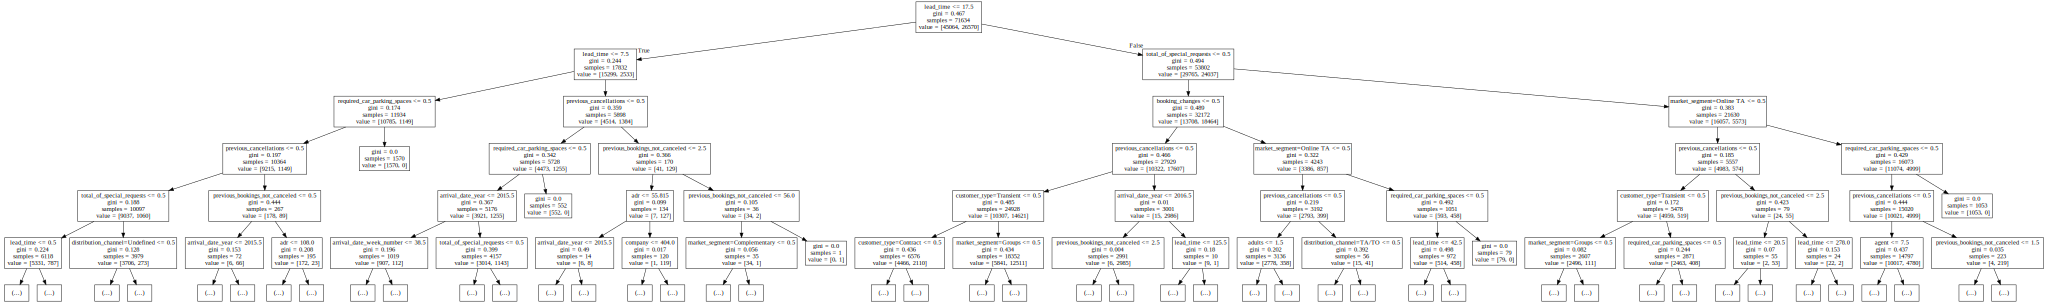

In [147]:
display(
    graphviz.Source(
        tree.export_graphviz(dtc,
                             feature_names=dv.get_feature_names(),
                             max_depth=5)), )


## Parameter tunning of Decision Tree


In [148]:
# selecting a max_depth

numbers = [1, 2, 3, 4, 5, 6, 10, 15, 20, 30, None]

for d in numbers:
    dtc = tree.DecisionTreeClassifier(max_depth=d)

    dtc.fit(X_train, y_train)

    y_pred_dtc = dtc.predict(X_test)

    auc = accuracy_score(y_test, y_pred_dtc)

    print(" %4s -> %.3f " % (d, auc))


    1 -> 0.625 
    2 -> 0.693 
    3 -> 0.729 
    4 -> 0.730 
    5 -> 0.769 
    6 -> 0.770 
   10 -> 0.808 
   15 -> 0.825 
   20 -> 0.827 
   30 -> 0.824 
 None -> 0.823 


Growth seem to stop around max_depth [10,20]


In [149]:
# Now lets test the scores changing the amount of leafs

scores = []

for depth in [10, 15, 20]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:

        dt = tree.DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)

        dt.fit(X_train, y_train)

        y_pred_dtc = dt.predict(X_test)

        auc = accuracy_score(y_test, y_pred_dtc)

        scores.append((depth, s, auc))


<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

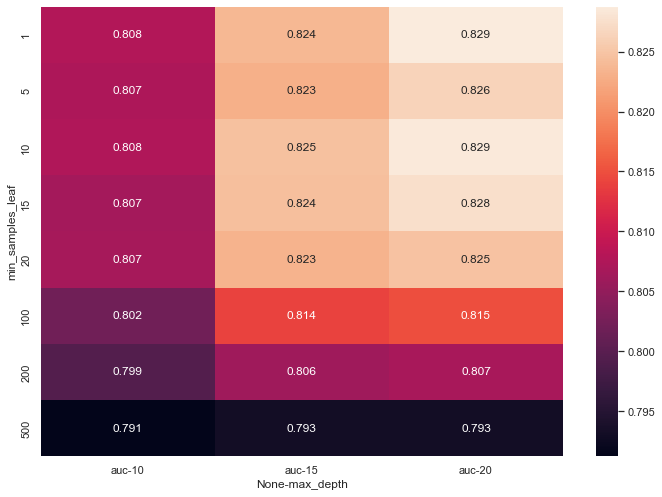

In [150]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf',
                                  columns=['max_depth'],
                                  values=['auc'])
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")


The best score seems to be at min_samples_leaf = 1 and max_depth of 20


In [237]:
dtc = tree.DecisionTreeClassifier(max_depth=20, min_samples_leaf=1)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Accuracy Score of Decision Tree (test dataset) is : {acc_dtc}")

Accuracy Score of Decision Tree (test dataset) is : 0.828042549627272


In [235]:
dtc = tree.DecisionTreeClassifier(max_depth=15, min_samples_leaf=1)
dtc.fit(X_train, y_train)

y_val_dtc = dtc.predict(X_val)

acc_dtc = accuracy_score(y_val, y_pred_dtc)
print(f"Accuracy Score of Decision Tree (Validation dataset) is : {acc_dtc}")

Accuracy Score of Decision Tree (Validation dataset) is : 0.8584052265683894


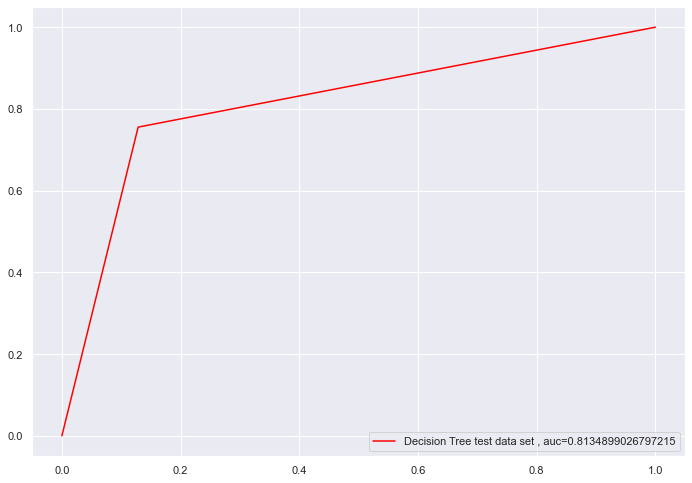

In [239]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_dtc)
auc = metrics.roc_auc_score(y_test, y_pred_dtc)
plt.plot(fpr, tpr, label="Decision Tree test data set , auc=" + str(auc),color='red')
plt.legend(loc=4)
plt.show()


We can see that the mayority of customers for Resort Hotels come From Portugal, which makes a lot of sense , given that both Hotels are located in Portugal, where H1 is located at Algarve and H2 at Lisbon .

# Random Forest


In [153]:
from sklearn.ensemble import RandomForestClassifier

Rf_model = RandomForestClassifier(n_estimators=20)
Rf_model.fit(X_train, y_train)
display(Rf_model.get_params())  # default_parameters of the random forest model


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [240]:
y_pred_rfm = Rf_model.predict(X_val)

acc_dtc = accuracy_score(y_val, y_pred_rfm)
print(
    f"Accuracy Score of Random Forest Classifier (Validation dataset) is : {acc_dtc}. \n"
)

print("------------ Confussion Matrix --------------- \n")
print(confusion_matrix(y_test, y_pred_rfm))

roc_rf = roc_auc_score(y_val, y_pred_rfm)
print(f"Roc auc score : {roc_rf}")

Accuracy Score of Random Forest Classifier (Validation dataset) is : 0.8584052265683894. 

------------ Confussion Matrix --------------- 

[[10201  4733]
 [ 6058  2886]]
Roc auc score : 0.83389785644562


Let's now do parameter tunning of the random forest model


In [155]:
print(f'Train Accuracy - : {Rf_model.score(X_train,y_train):.3f}')
print(f'Test Accuracy - : {Rf_model.score(X_test,y_test):.3f}')


Train Accuracy - : 0.988
Test Accuracy - : 0.863


The score for train is quite big , it may be overfitting


### Feature Importance within the Random Forest


In [156]:
importances = Rf_model.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(df_train.columns)

#create a list of tuples
feature_importance = sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df_imp = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance = list(df_imp['importance'])
feature = list(df_imp['feature'])

#see df
print(df_imp)


    importance                         feature
0     0.103071                           hotel
1     0.072004              arrival_date_month
2     0.058972          previous_cancellations
3     0.053360               arrival_date_year
4     0.034638                   customer_type
5     0.025696              assigned_room_type
6     0.022594  previous_bookings_not_canceled
7     0.018550                       lead_time
8     0.017028            days_in_waiting_list
9     0.012002         reservation_status_date
10    0.008804                 booking_changes
11    0.006443                             adr
12    0.005868                        children
13    0.005645       arrival_date_day_of_month
14    0.005520       total_of_special_requests
15    0.005369                    deposit_type
16    0.005349                          babies
17    0.005335                         country
18    0.004930        arrival_date_week_number
19    0.004482            distribution_channel
20    0.00444

## Parameter tunning of Random Forest | Grid SearchCV


- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is - split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)


In [157]:
from sklearn.model_selection import GridSearchCV


In [158]:
param_grid = {
    "max_depth": [10, 13],
    "n_estimators": [10, 100],
    "min_samples_split": [2, 5]
}


In [159]:
display(param_grid)

{'max_depth': [10, 13], 'n_estimators': [10, 100], 'min_samples_split': [2, 5]}

---

**NOTE**

(This may take a while)

---


In [160]:
rf = RandomForestClassifier()

rf_grid = GridSearchCV(estimator=rf,
                       param_grid=param_grid,
                       cv=10,
                       verbose=2,
                       n_jobs=-1)
#cv reduces chances of over_fitting

rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 13], 'min_samples_split': [2, 5],
                         'n_estimators': [10, 100]},
             verbose=2)

In [161]:
rf_grid.best_params_

{'max_depth': 13, 'min_samples_split': 5, 'n_estimators': 100}

{'max_depth': 13, 'min_samples_split': 2, 'n_estimators': 100}


In [245]:
print(f'Train Accuracy - : {rf_grid.score(X_train,y_train):.3f}')
print(f'Test Accuracy - : {rf_grid.score(X_test,y_test):.3f}')
print(f'Val Accuracy - : {rf_grid.score(X_val,y_val):.3f}')


Train Accuracy - : 0.834
Test Accuracy - : 0.827
Val Accuracy - : 0.827


In [246]:
y_pred_rfm_tuned = rf_grid.predict(X_test)


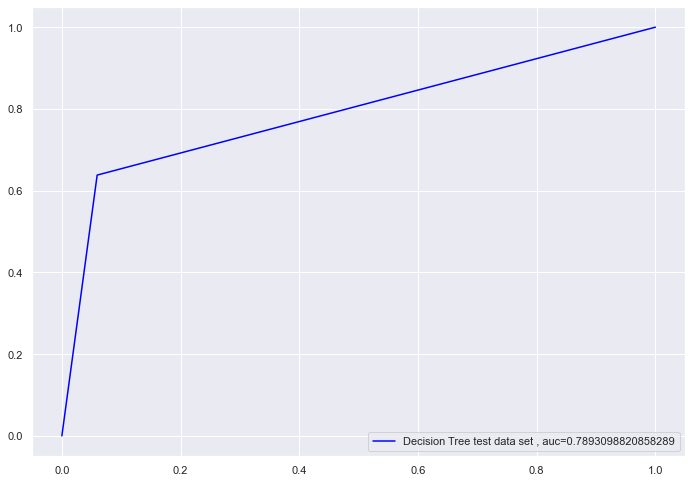

In [248]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_rfm_tuned)
auc = metrics.roc_auc_score(y_test, y_pred_rfm_tuned)
plt.plot(fpr, tpr, label="Decision Tree test data set , auc=" + str(auc),color='blue')
plt.legend(loc=4)
plt.show()

With these parameters the difference is not that significant


# XGBoost using Scikit-Learn API


In [265]:
xgb_params = {
            'learning_rate': 0.1,  # also called eta
            'max_depth':5,
            'n_estimators':5000, # max_amount of trees
            'subsample':0.5, #
            'colsample_bytree':0.5, # half of the features will be used randomly
            'eval_metric':'auc', # area under auc curve as a metric
            'verbosity':2,
            

}

eval_set = [(X_test, y_test),(X_val, y_val)]

model_xgboost = xgboost.XGBClassifier(**xgb_params)

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)


C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[02:41:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[0]	validation_0-auc:0.79252	validation_1-auc:0.79405
[02:41:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[1]	validation_0-auc:0.80329	validation_1-auc:0.80362
[02:41:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[2]	validation_0-auc:0.82185	validation_1-auc:0.82273
[02:41:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[3]	validation_0-auc:0.83534	validation_1-auc:0.83661
[02:41:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/tree/updater_prune

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=2)

In [266]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_val)[:,1]
y_test_pred= model_xgboost.predict_proba(X_test)[:,1]


print("AUC Train: {:.4f}\nAUC Valid: {:.4f} \nAUC Test: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_val, y_valid_pred),roc_auc_score(y_test, y_test_pred) ))


AUC Train: 0.9450
AUC Valid: 0.9182 
AUC Test: 0.9180


In [267]:
y_pred_xbg = model_xgboost.predict(X_test)

clf_report = classification_report(y_test, y_pred_xbg)
print(f"Classification Report : \n{clf_report}")


Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     14934
           1       0.84      0.73      0.79      8944

    accuracy                           0.85     23878
   macro avg       0.85      0.83      0.84     23878
weighted avg       0.85      0.85      0.85     23878



We can see a significant improvement in scores with XGBoost

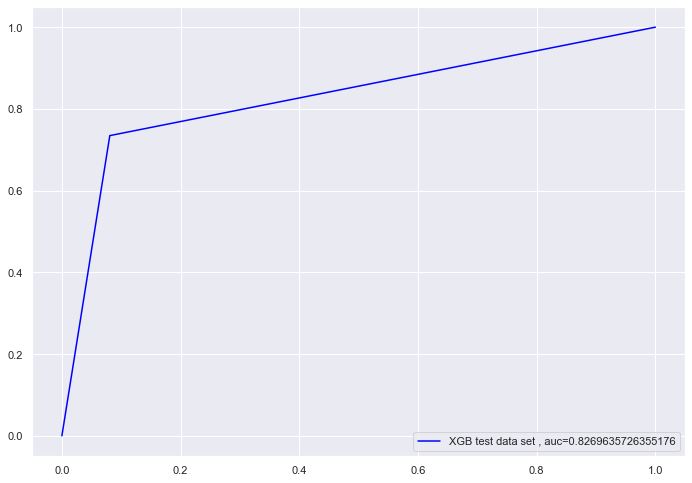

In [268]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_xbg)
auc = metrics.roc_auc_score(y_test, y_pred_xbg)
plt.plot(fpr, tpr, label="XGB test data set , auc=" + str(auc),color='blue')
plt.legend(loc=4)
plt.show()

We can see that the mayority of customers for Resort Hotels come From Portugal, which makes a lot of sense , given that both Hotels are located in Portugal, where H1 is located at Algarve and H2 at Lisbon .

## Hyperparameter Tunning for XGBoost with `RandomizedSearchCV`

We will use `RandomizedSearchCV` to tune the parameters and try to squeeze as much performance of the model as possible.

In [209]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "tree_method"      :['gpu_hist'], # USE GPU
  "random_state" : [0] # Allow for reproducibility of random search

}

**_NOTE: Using tree_method='gpu_hist' can help a lot with the execution times of RandomSearchCV , depending of your GPU configuration. In my case I saw my times halted from 30 minutes all the way down to 1 minute of execution_**

In [210]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [211]:
model_tuned = xgboost.XGBClassifier()

In [213]:
random_search=RandomizedSearchCV(model_tuned,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[02:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [214]:
random_search.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.1, gpu_id=0,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [215]:
random_search.best_params_


{'tree_method': 'gpu_hist',
 'random_state': 0,
 'min_child_weight': 7,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [216]:
df_cv_results = pd.DataFrame(random_search.cv_results_)
df_cv_results.params[0]


{'tree_method': 'gpu_hist',
 'random_state': 0,
 'min_child_weight': 7,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [261]:
xgb_params = {
            'learning_rate': 0.1,  # also called eta
            'random_state': 0,
             'min_child_weight': 7,
            'gamma': 0.2,
            'max_depth':15,
            'subsample':0.5, #
            'n_estimators':5000, # max_amount of trees
            'colsample_bytree': 0.3,
            'eval_metric':'auc', # area under auc curve as a metric
            'verbosity':2,
            'tree_method':'gpu_hist' # use GPU  
}

eval_set = [(X_test, y_test),(X_val, y_val)]

model_xgboost = xgboost.XGBClassifier(**xgb_params)

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[0]	validation_0-auc:0.76434	validation_1-auc:0.76921
[1]	validation_0-auc:0.84406	validation_1-auc:0.84383
[2]	validation_0-auc:0.85393	validation_1-auc:0.85310
[3]	validation_0-auc:0.85523	validation_1-auc:0.85468
[4]	validation_0-auc:0.85803	validation_1-auc:0.85684
[5]	validation_0-auc:0.87150	validation_1-auc:0.87055
[6]	validation_0-auc:0.87388	validation_1-auc:0.87328
[7]	validation_0-auc:0.87373	validation_1-auc:0.87280
[8]	validation_0-auc:0.87684	validation_1-auc:0.87599
[9]	validation_0-auc:0.87571	validation_1-auc:0.87516
[10]	validation_0-auc:0.88243	validation_1-auc:0.88201
[11]	validation_0-auc:0.88161	validation_1-auc:0.88149
[12]	validation_0-auc:0.88397	validation_1-auc:0.88352
[13]	validation_0-auc:0.88700	validation_1-auc:0.88680
[14]	validation_0-auc:0.88775	validation_1-auc:0.88760
[15]	validation_0-auc:0.88735	validation_1-auc:0.88724
[16]	validation_0-auc:0.89273	validation_1-auc:0.89229
[17]	validation_0-auc:0.89355	validation_1-auc:0.89311
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='auc', gamma=0.2, gpu_id=0,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='gpu_hist',
              validate_parameters=1, verbosity=2)

In [258]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_val)[:,1]
y_test_pred= model_xgboost.predict_proba(X_test)[:,1]


print("AUC Train: {:.4f}\nAUC Valid: {:.4f} \nAUC Test: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_val, y_valid_pred),roc_auc_score(y_test, y_test_pred) ))


AUC Train: 0.9710
AUC Valid: 0.9232 
AUC Test: 0.9249


In [262]:
y_pred_xbg_tuned = model_xgboost.predict(X_test)

conf = confusion_matrix(y_test, y_pred_xbg_tuned)
conf



array([[13696,  1238],
       [ 2174,  6770]], dtype=int64)

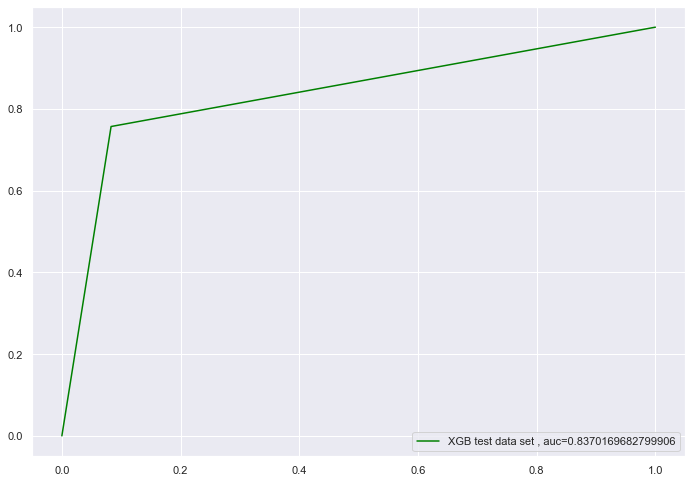

In [269]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_xbg_tuned)
auc = metrics.roc_auc_score(y_test, y_pred_xbg_tuned)
plt.plot(fpr, tpr, label="XGB test data set , auc=" + str(auc),color='green')
plt.legend(loc=4)
plt.show()

In [221]:
clf_report = classification_report(y_test, y_test_pred)
print(f"Classification Report : \n{clf_report}")


Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     14934
           1       0.85      0.76      0.80      8944

    accuracy                           0.86     23878
   macro avg       0.85      0.84      0.84     23878
weighted avg       0.86      0.86      0.86     23878



### Prediction with tuned XGBoost

In [222]:
customer = dicts_test[30]


In [223]:
customer

{'hotel': 'City Hotel',
 'arrival_date_month': 'June',
 'meal': 'HB',
 'market_segment': 'Offline TA/TO',
 'distribution_channel': 'TA/TO',
 'customer_type': 'Transient-Party',
 'lead_time': 265,
 'arrival_date_year': 2016,
 'arrival_date_week_number': 26,
 'arrival_date_day_of_month': 24,
 'stays_in_weekend_nights': 0,
 'stays_in_week_nights': 2,
 'adults': 2,
 'children': 0.0,
 'babies': 0,
 'is_repeated_guest': 0,
 'previous_cancellations': 0,
 'previous_bookings_not_canceled': 0,
 'booking_changes': 0,
 'agent': 6,
 'company': 0,
 'days_in_waiting_list': 0,
 'adr': 115.0,
 'required_car_parking_spaces': 0,
 'total_of_special_requests': 1}

In [270]:
X_small = dv.transform([customer])
model_xgboost.predict_proba(X_small)[0, 1]


0.017651424

In [225]:
y_test[30]

0

In [226]:
dv.get_feature_names()

['adr',
 'adults',
 'agent',
 'arrival_date_day_of_month',
 'arrival_date_month=April',
 'arrival_date_month=August',
 'arrival_date_month=December',
 'arrival_date_month=February',
 'arrival_date_month=January',
 'arrival_date_month=July',
 'arrival_date_month=June',
 'arrival_date_month=March',
 'arrival_date_month=May',
 'arrival_date_month=November',
 'arrival_date_month=October',
 'arrival_date_month=September',
 'arrival_date_week_number',
 'arrival_date_year',
 'babies',
 'booking_changes',
 'children',
 'company',
 'customer_type=Contract',
 'customer_type=Group',
 'customer_type=Transient',
 'customer_type=Transient-Party',
 'days_in_waiting_list',
 'distribution_channel=Corporate',
 'distribution_channel=Direct',
 'distribution_channel=GDS',
 'distribution_channel=TA/TO',
 'distribution_channel=Undefined',
 'hotel=City Hotel',
 'hotel=Resort Hotel',
 'is_repeated_guest',
 'lead_time',
 'market_segment=Aviation',
 'market_segment=Complementary',
 'market_segment=Corporate',
 '

In [230]:
from xgboost import plot_importance

## Selecting the final model

- Summarizing the results:

## Conclusions